[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 4.8, and Figures 4.3 and 4.6 

Analysis of user ratings for the movies Independence Day and Mission Impossible\
Topics: Joint probability mass function, marginal distribution, conditional distribution

Author: Carlos Fernandez-Granda\
Data source: https://grouplens.org/datasets/movielens/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

font_size = 20
font_size_ticks = 15

rating_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', encoding='latin-1',names=rating_names)
movie_names = ['movie_id', 'title', 'release_date']
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', names=movie_names,usecols=range(3),
                     encoding='latin-1')
data = pd.merge(movies,ratings)

In [3]:
def joint_pmf(movie_1,movie_2,verbose):
    ratings_1 = data[data["title"] == movie_1]
    ratings_2 = data[data["title"] == movie_2]
    if verbose:
        print(ratings_1[:2])
        print(ratings_2[:2])

    counts = np.zeros((5,5))
    total_counts = 0.0

    for index, row in ratings_1.iterrows():
        user_id = row['user_id']
        aux_2 = ratings_2[ratings_2["user_id"] == user_id]
        if len(aux_2)==0:
            if verbose:
                print("no match")
        elif len(aux_2)>1:
            if verbose:
                print("more than one match")
        else:
            rating_1 = row['rating']
            rating_2 = aux_2['rating'].values[0]
            if verbose:
                print("rating 1 : " + str(rating_1) + " rating 2: " + str(rating_2))
            counts[rating_1-1,rating_2-1] += 1
            total_counts += 1
    joint_pmf = counts/total_counts
    
    if verbose:
        print(counts)
        print(joint_pmf)
    
    return counts, joint_pmf

verbose = False
movie_1 = 'Mission: Impossible (1996)'
movie_2 = 'Independence Day (ID4) (1996)'
counts, joint_pmf = joint_pmf(movie_1,movie_2,verbose)
# print(counts)
np.set_printoptions(precision=4)
print("Joint pmf of " + movie_1 + ' and ' + movie_2)
print(joint_pmf)

marginal_pmf_1 = np.sum(joint_pmf,axis=1)
print("Marginal pmf of " + movie_1)
print(marginal_pmf_1)

marginal_pmf_2 = np.sum(joint_pmf,axis=0)
print("Marginal pmf of " + movie_2)
print(marginal_pmf_2)


Joint pmf of Mission: Impossible (1996) and Independence Day (ID4) (1996)
[[0.0064 0.0096 0.0159 0.0032 0.    ]
 [0.0096 0.0382 0.0573 0.035  0.0159]
 [0.0159 0.0446 0.1178 0.1306 0.0541]
 [0.0191 0.0478 0.0637 0.1497 0.0605]
 [0.     0.     0.0127 0.0382 0.0541]]
Marginal pmf of Mission: Impossible (1996)
[0.035  0.1561 0.3631 0.3408 0.1051]
Marginal pmf of Independence Day (ID4) (1996)
[0.051  0.1401 0.2675 0.3567 0.1847]


Text(0.5, 1.0, 'Independence Day (ID4) (1996)')

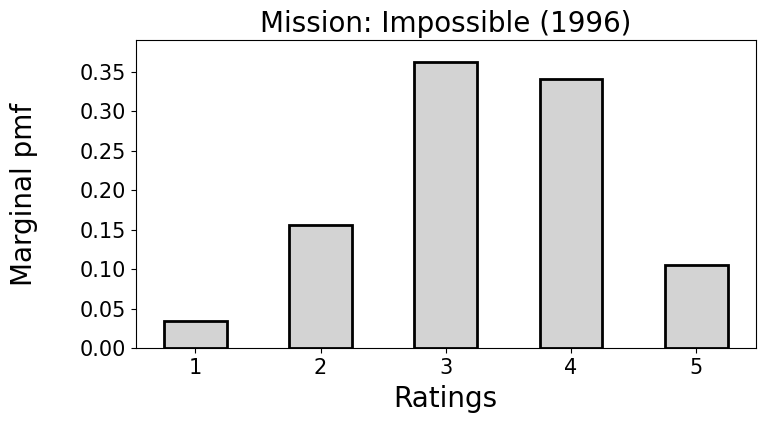

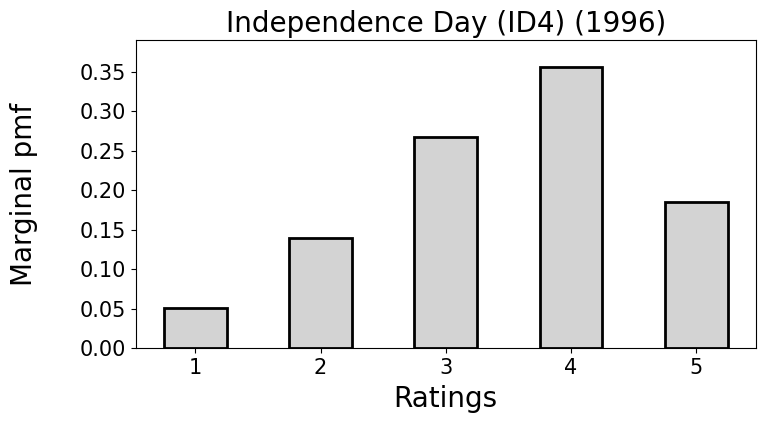

In [14]:
vals = [1,2,3,4,5]
ymax = 0.39
plt.figure(figsize=(8,4))
plt.bar(vals,marginal_pmf_1, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(1, 5+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.ylabel("Marginal pmf",fontsize=font_size,labelpad = 30)
plt.xlabel("Ratings",fontsize=font_size,labelpad = 5)
plt.title(movie_1,fontsize=font_size)

plt.figure(figsize=(8,4))
plt.bar(vals,marginal_pmf_2, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(1, 5+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.ylabel("Marginal pmf",fontsize=font_size,labelpad = 30)
plt.xlabel("Ratings",fontsize=font_size,labelpad = 5)
plt.title(movie_2,fontsize=font_size)

Conditional pmf of Independence Day (ID4) (1996) given rating for Mission: Impossible (1996) = 1
[0.1818 0.2727 0.4545 0.0909 0.    ]
Conditional pmf of Independence Day (ID4) (1996) given rating for Mission: Impossible (1996) = 2
[0.0612 0.2449 0.3673 0.2245 0.102 ]
Conditional pmf of Independence Day (ID4) (1996) given rating for Mission: Impossible (1996) = 3
[0.0439 0.1228 0.3246 0.3596 0.1491]
Conditional pmf of Independence Day (ID4) (1996) given rating for Mission: Impossible (1996) = 4
[0.0561 0.1402 0.1869 0.4393 0.1776]
Conditional pmf of Independence Day (ID4) (1996) given rating for Mission: Impossible (1996) = 5
[0.     0.     0.1212 0.3636 0.5152]


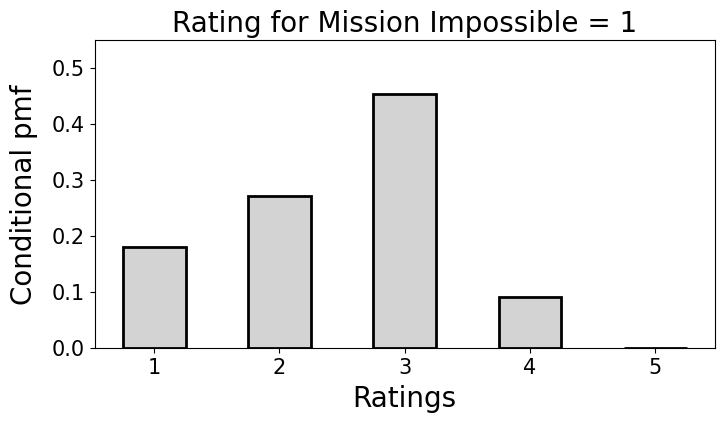

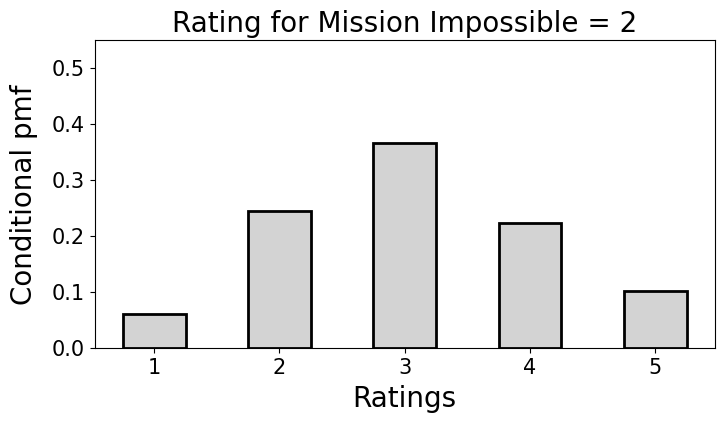

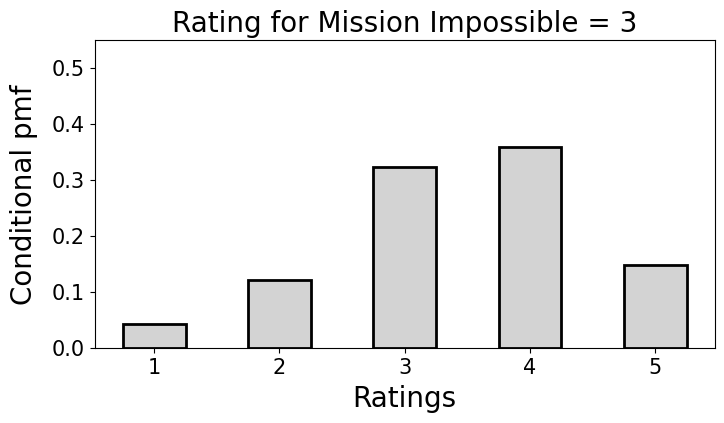

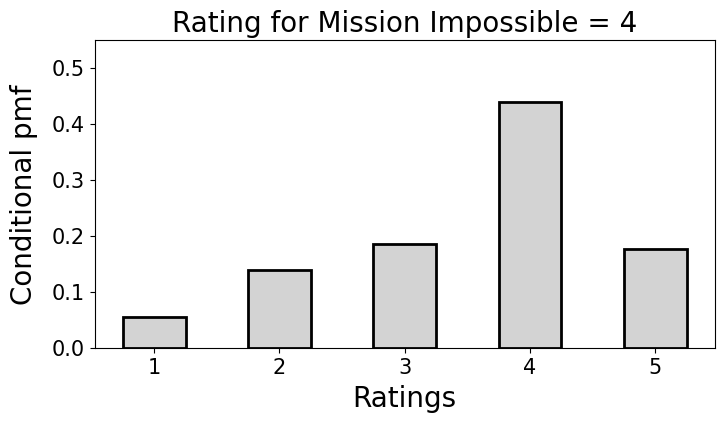

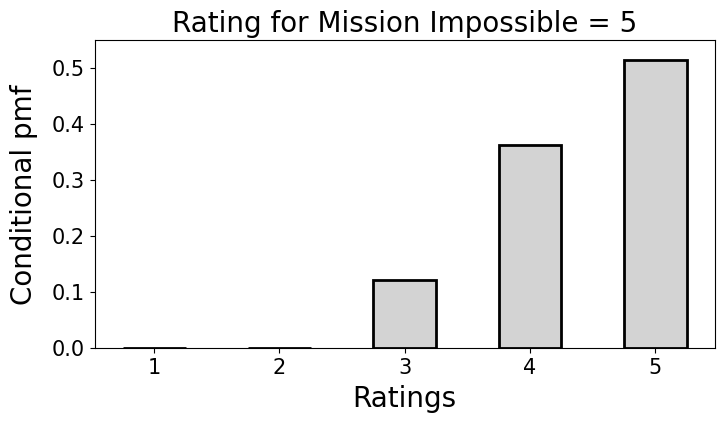

In [13]:
ymax = 0.55

for rat in range(5):
    print("Conditional pmf of " + movie_2 + " given rating for " + movie_1 + " = " + str(rat+1))
    cond_pmf_2_given_1 = joint_pmf[rat,:] / np.sum(joint_pmf[rat,:])
    print(cond_pmf_2_given_1)
    
    plt.figure(figsize=(8,4))
    plt.bar(vals,cond_pmf_2_given_1, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
    plt.xticks(np.arange(1, 5+1, 1))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([0,ymax])
    plt.ylabel("Conditional pmf",fontsize=font_size,labelpad = 10)
    plt.xlabel("Ratings",fontsize=font_size,labelpad = 5)
    plt.title("Rating for Mission Impossible = " + str(rat + 1),fontsize=font_size)